<a href="https://colab.research.google.com/github/valmirf/processamento_imagens/blob/master/Filtros/Aula_04_Opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opencv - Aula 3

In [2]:
!git clone https://github.com/valmirf/processamento_imagens.git


Cloning into 'processamento_imagens'...
remote: Enumerating objects: 366, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 366 (delta 50), reused 87 (delta 34), pack-reused 244
Receiving objects: 100% (366/366), 48.10 MiB | 32.45 MiB/s, done.
Resolving deltas: 100% (141/141), done.


Imports necessários

In [5]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

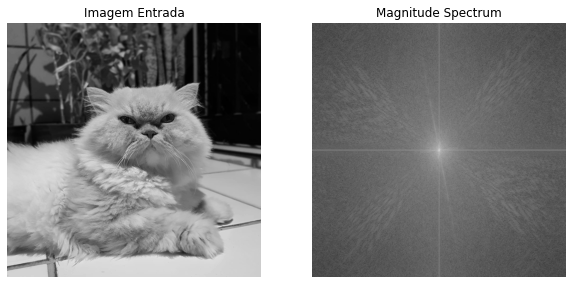

In [7]:
lena = cv2.imread('processamento_imagens/imagens/pudimcat.jpg',0)
dft = cv2.dft(np.float32(lena),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(lena, cmap='gray')
ax[0].set_title('Imagem Entrada')
ax[0].set_axis_off()

ax[1].imshow(magnitude_spectrum, cmap='gray')
ax[1].set_title('Magnitude Spectrum')
ax[1].set_axis_off()

## 1. TRANSFORMADA DE FOURIER

### 1.1 TRANSFORMADA INVERSA

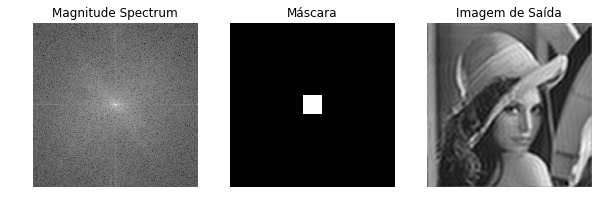

In [ ]:
rows, cols = lena.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2))
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(magnitude_spectrum, cmap='gray')
ax[0].set_title('Magnitude Spectrum')
ax[0].set_axis_off()

ax[1].imshow(mask[:,:,0], cmap='gray')
ax[1].set_title('Máscara')
ax[1].set_axis_off()

ax[2].imshow(img_back, cmap='gray')
ax[2].set_title('Imagem de Saída')
ax[2].set_axis_off()


## 2. Filtragem no domínio da frequência

### 2.1 Gaussiano (Passa-Baixa)

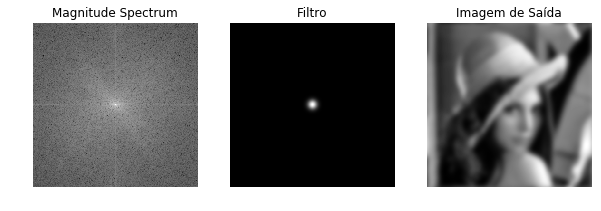

In [ ]:
# create a mask first
mask = np.zeros((rows,cols,2))
ksize = rows
fil         = cv2.getGaussianKernel(512,10)
fil         = fil * fil.T
mask[:,:,0] =fil
mask[:,:,1] =fil

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(magnitude_spectrum, cmap='gray')
ax[0].set_title('Magnitude Spectrum')
ax[0].set_axis_off()

ax[1].imshow(mask[:,:,0], cmap='gray')
ax[1].set_title('Filtro')
ax[1].set_axis_off()

ax[2].imshow(img_back, cmap='gray')
ax[2].set_title('Imagem de Saída')
ax[2].set_axis_off()

array([[[4.93510741e-287, 4.93510741e-287],
        [6.32044327e-286, 6.32044327e-286],
        [8.01411411e-285, 8.01411411e-285],
        ...,
        [8.01411411e-285, 8.01411411e-285],
        [6.32044327e-286, 6.32044327e-286],
        [4.93510741e-287, 4.93510741e-287]],

       [[6.32044327e-286, 6.32044327e-286],
        [8.09465730e-285, 8.09465730e-285],
        [1.02637591e-283, 1.02637591e-283],
        ...,
        [1.02637591e-283, 1.02637591e-283],
        [8.09465730e-285, 8.09465730e-285],
        [6.32044327e-286, 6.32044327e-286]],

       [[8.01411411e-285, 8.01411411e-285],
        [1.02637591e-283, 1.02637591e-283],
        [1.30141088e-282, 1.30141088e-282],
        ...,
        [1.30141088e-282, 1.30141088e-282],
        [1.02637591e-283, 1.02637591e-283],
        [8.01411411e-285, 8.01411411e-285]],

       ...,

       [[8.01411411e-285, 8.01411411e-285],
        [1.02637591e-283, 1.02637591e-283],
        [1.30141088e-282, 1.30141088e-282],
        ...,
     